<a href="https://colab.research.google.com/github/PuffBear/Algorithmic-Trading/blob/master/FundManager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [3]:
import yfinance as yf
# one of the most necessary libraries for this project

# extracting stock names
import pandas as pd
file_path = "ind_nifty200list.csv"
df = pd.read_csv(file_path)
nifty_200_symbols = df['Symbol'].astype(str) + '.NS'
nifty_200_symbols = nifty_200_symbols.tolist()
print(nifty_200_symbols)

['ABB.NS', 'ACC.NS', 'APLAPOLLO.NS', 'AUBANK.NS', 'ADANIENSOL.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS', 'ATGL.NS', 'ABCAPITAL.NS', 'ABFRL.NS', 'ALKEM.NS', 'AMBUJACEM.NS', 'APOLLOHOSP.NS', 'APOLLOTYRE.NS', 'ASHOKLEY.NS', 'ASIANPAINT.NS', 'ASTRAL.NS', 'AUROPHARMA.NS', 'DMART.NS', 'AXISBANK.NS', 'BSE.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BAJAJHLDNG.NS', 'BALKRISIND.NS', 'BANDHANBNK.NS', 'BANKBARODA.NS', 'BANKINDIA.NS', 'MAHABANK.NS', 'BDL.NS', 'BEL.NS', 'BHARATFORG.NS', 'BHEL.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'BHARTIHEXA.NS', 'BIOCON.NS', 'BOSCHLTD.NS', 'BRITANNIA.NS', 'CGPOWER.NS', 'CANBK.NS', 'CHOLAFIN.NS', 'CIPLA.NS', 'COALINDIA.NS', 'COCHINSHIP.NS', 'COFORGE.NS', 'COLPAL.NS', 'CONCOR.NS', 'CUMMINSIND.NS', 'DLF.NS', 'DABUR.NS', 'DELHIVERY.NS', 'DIVISLAB.NS', 'DIXON.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'ESCORTS.NS', 'EXIDEIND.NS', 'NYKAA.NS', 'FEDERALBNK.NS', 'FACT.NS', 'GAIL.NS', 'GMRINFRA.NS', 'GODREJCP.NS', 'GODREJPROP.NS', 'GRASIM.NS', 'H

In [6]:
len(nifty_200_symbols)

200

In [15]:
import numpy as np
# ok so there are 200 stocks on this
metrics = []

for symbol in nifty_200_symbols:
    try:
        ticker = yf.Ticker(symbol)
        data = ticker.history(period="2y")

        if not data.empty:
            daily_returns = data['Close'].pct_change()
            mean_return = daily_returns.mean() * 252
            volatility = daily_returns.std() * np.sqrt(252)
            cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
            sharpe_ratio = (mean_return - 0.0679) / volatility
            metrics.append({
                'stocks': symbol,
                'mean_return': mean_return,
                'volatility': volatility,
                'cumulative_return': cumulative_return,
                'sharpe_ratio': sharpe_ratio
            })
            print(f"Metrics calculated for {symbol}")
        else:
            print(f"No data for {symbol}")
    except Exception as e:
        print(f"Failed to fetch data for {symbol}: {e}")

metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.sort_values(by='sharpe_ratio', ascending=False)
print(metrics_df)

<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for ABB.NS
Metrics calculated for ACC.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for APLAPOLLO.NS
Metrics calculated for AUBANK.NS
Metrics calculated for ADANIENSOL.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for ADANIENT.NS
Metrics calculated for ADANIGREEN.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for ADANIPORTS.NS
Metrics calculated for ADANIPOWER.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for ATGL.NS
Metrics calculated for ABCAPITAL.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for ABFRL.NS
Metrics calculated for ALKEM.NS
Metrics calculated for AMBUJACEM.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for APOLLOHOSP.NS
Metrics calculated for APOLLOTYRE.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for ASHOKLEY.NS
Metrics calculated for ASIANPAINT.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for ASTRAL.NS
Metrics calculated for AUROPHARMA.NS
Metrics calculated for DMART.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for AXISBANK.NS
Metrics calculated for BSE.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for BAJAJ-AUTO.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for BAJFINANCE.NS
Metrics calculated for BAJAJFINSV.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for BAJAJHLDNG.NS
Metrics calculated for BALKRISIND.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for BANDHANBNK.NS
Metrics calculated for BANKBARODA.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for BANKINDIA.NS
Metrics calculated for MAHABANK.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for BDL.NS
Metrics calculated for BEL.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for BHARATFORG.NS
Metrics calculated for BHEL.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for BPCL.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for BHARTIARTL.NS
Metrics calculated for BIOCON.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for BOSCHLTD.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for BRITANNIA.NS
Metrics calculated for CGPOWER.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for CANBK.NS
Metrics calculated for CHOLAFIN.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for CIPLA.NS
Metrics calculated for COALINDIA.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for COCHINSHIP.NS
Metrics calculated for COFORGE.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for COLPAL.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for CONCOR.NS
Metrics calculated for CUMMINSIND.NS
Metrics calculated for DLF.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for DABUR.NS
Metrics calculated for DELHIVERY.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for DIVISLAB.NS
Metrics calculated for DIXON.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for DRREDDY.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for EICHERMOT.NS
Metrics calculated for ESCORTS.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for EXIDEIND.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for NYKAA.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for FEDERALBNK.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for FACT.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for GAIL.NS
Metrics calculated for GMRINFRA.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for GODREJCP.NS
Metrics calculated for GODREJPROP.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for GRASIM.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for HCLTECH.NS
Metrics calculated for HDFCAMC.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for HDFCBANK.NS
Metrics calculated for HDFCLIFE.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for HAVELLS.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for HEROMOTOCO.NS
Metrics calculated for HINDALCO.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for HAL.NS
Metrics calculated for HINDPETRO.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for HINDUNILVR.NS
Metrics calculated for HINDZINC.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for HUDCO.NS
Metrics calculated for ICICIBANK.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for ICICIGI.NS
Metrics calculated for ICICIPRULI.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for IDBI.NS
Metrics calculated for IDFCFIRSTB.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for IRB.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for ITC.NS
Metrics calculated for INDIANB.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for INDHOTEL.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for IOC.NS
Metrics calculated for IOB.NS
Metrics calculated for IRCTC.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for IRFC.NS
Metrics calculated for IREDA.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for IGL.NS
Metrics calculated for INDUSTOWER.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for INDUSINDBK.NS
Metrics calculated for NAUKRI.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for INFY.NS
Metrics calculated for INDIGO.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for JSWENERGY.NS
Metrics calculated for JSWINFRA.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for JSWSTEEL.NS
Metrics calculated for JINDALSTEL.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for JIOFIN.NS
Metrics calculated for JUBLFOOD.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for KPITTECH.NS
Metrics calculated for KALYANKJIL.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for KOTAKBANK.NS
Metrics calculated for LTF.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for LICHSGFIN.NS
Metrics calculated for LTIM.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for LT.NS
Metrics calculated for LICI.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for LUPIN.NS
Metrics calculated for MRF.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for LODHA.NS
Metrics calculated for M&MFIN.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for M&M.NS
Metrics calculated for MRPL.NS
Metrics calculated for MANKIND.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for MARICO.NS
Metrics calculated for MARUTI.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for MFSL.NS
Metrics calculated for MAXHEALTH.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for MAZDOCK.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for MPHASIS.NS
Metrics calculated for MUTHOOTFIN.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for NHPC.NS
Metrics calculated for NLCINDIA.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for NMDC.NS
Metrics calculated for NTPC.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for NESTLEIND.NS
Metrics calculated for OBEROIRLTY.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for ONGC.NS
Metrics calculated for OIL.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for PAYTM.NS
Metrics calculated for OFSS.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for POLICYBZR.NS
Metrics calculated for PIIND.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for PAGEIND.NS
Metrics calculated for PATANJALI.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for PERSISTENT.NS
Metrics calculated for PETRONET.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for PHOENIXLTD.NS
Metrics calculated for PIDILITIND.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for POLYCAB.NS
Metrics calculated for POONAWALLA.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for PFC.NS
Metrics calculated for POWERGRID.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for PRESTIGE.NS
Metrics calculated for PNB.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for RECLTD.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for RVNL.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for RELIANCE.NS
Metrics calculated for SBICARD.NS
Metrics calculated for SBILIFE.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for SJVN.NS
Metrics calculated for SRF.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for MOTHERSON.NS
Metrics calculated for SHREECEM.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for SHRIRAMFIN.NS
Metrics calculated for SIEMENS.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for SOLARINDS.NS
Metrics calculated for SONACOMS.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for SBIN.NS
Metrics calculated for SAIL.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for SUNPHARMA.NS
Metrics calculated for SUNDARMFIN.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for SUPREMEIND.NS
Metrics calculated for SUZLON.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for TVSMOTOR.NS
Metrics calculated for TATACHEM.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for TATACOMM.NS
Metrics calculated for TCS.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for TATACONSUM.NS
Metrics calculated for TATAELXSI.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for TATAMOTORS.NS
Metrics calculated for TATAPOWER.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for TATASTEEL.NS
Metrics calculated for TATATECH.NS
Metrics calculated for TECHM.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for TITAN.NS
Metrics calculated for TORNTPHARM.NS
Metrics calculated for TORNTPOWER.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for TRENT.NS
Metrics calculated for TIINDIA.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for UPL.NS
Metrics calculated for ULTRACEMCO.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for UNIONBANK.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for VBL.NS
Metrics calculated for VEDL.NS
Metrics calculated for IDEA.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for VOLTAS.NS


<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


Metrics calculated for WIPRO.NS
Metrics calculated for YESBANK.NS
Metrics calculated for ZOMATO.NS
Metrics calculated for ZYDUSLIFE.NS
            stocks  mean_return  volatility  cumulative_return  sharpe_ratio
22          BSE.NS     1.312559    0.516260           8.971641      2.410912
185       TRENT.NS     0.852925    0.325852           3.755192      2.409146
93        IREDA.NS     1.516055    0.664675           2.685833      2.178741
107  KALYANKJIL.NS     1.060971    0.463399           5.410410      2.143013
152      RECLTD.NS     0.991086    0.441154           4.663455      2.092663
..             ...          ...         ...                ...           ...
52        DABUR.NS    -0.057650    0.205109          -0.142151     -0.612113
187         UPL.NS    -0.130632    0.264271          -0.276097     -0.751245
17   ASIANPAINT.NS    -0.116319    0.189793          -0.230507     -0.970630
9          ATGL.NS    -0.656195    0.597406          -0.803374     -1.212065
180    TATATECH.NS

<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1
<ipython-input-15-5121efab6575>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (data['Close'][-1] / data['Close'][0]) - 1


In [22]:
# Summary statistics
print(metrics_df.describe())

# Top 10 stocks by Sharpe ratio
top_stocks = metrics_df.nlargest(10, 'sharpe_ratio')
print(top_stocks)

# Bottom 10 stocks by Sharpe ratio
worst_stocks = metrics_df.nsmallest(10, 'sharpe_ratio')
print(worst_stocks)

       mean_return  volatility  cumulative_return  sharpe_ratio
count   198.000000  198.000000         198.000000    198.000000
mean      0.363174    0.327886           1.068071      0.840985
std       0.296209    0.107212           1.299122      0.706800
min      -0.656195    0.173411          -0.803374     -1.460338
25%       0.176460    0.251022           0.288580      0.363281
50%       0.324562    0.304208           0.761339      0.889021
75%       0.502615    0.376168           1.363741      1.355245
max       1.516055    0.664889           8.971641      2.410912
            stocks  mean_return  volatility  cumulative_return  sharpe_ratio
22          BSE.NS     1.312559    0.516260           8.971641      2.410912
185       TRENT.NS     0.852925    0.325852           3.755192      2.409146
93        IREDA.NS     1.516055    0.664675           2.685833      2.178741
107  KALYANKJIL.NS     1.060971    0.463399           5.410410      2.143013
152      RECLTD.NS     0.991086    0.44

In [23]:
high_sharpe_stocks = metrics_df[metrics_df['sharpe_ratio'] > 2.0]
print(high_sharpe_stocks)
positive_returns = metrics_df[metrics_df['mean_return'] > 0]
print(positive_returns)
filtered_stocks = metrics_df[(metrics_df['sharpe_ratio'] > 2.0) & (metrics_df['cumulative_return'] > 0)]
print(filtered_stocks)

            stocks  mean_return  volatility  cumulative_return  sharpe_ratio
22          BSE.NS     1.312559    0.516260           8.971641      2.410912
185       TRENT.NS     0.852925    0.325852           3.755192      2.409146
93        IREDA.NS     1.516055    0.664675           2.685833      2.178741
107  KALYANKJIL.NS     1.060971    0.463399           5.410410      2.143013
152      RECLTD.NS     0.991086    0.441154           4.663455      2.092663
137        OFSS.NS     0.829638    0.370874           3.427488      2.053903
55        DIXON.NS     0.833565    0.378873           3.395041      2.020900
138   POLICYBZR.NS     0.881680    0.406039           3.746368      2.004188
196      ZOMATO.NS     0.861492    0.396497           3.593944      2.001511
            stocks  mean_return  volatility  cumulative_return  sharpe_ratio
22          BSE.NS     1.312559    0.516260           8.971641      2.410912
185       TRENT.NS     0.852925    0.325852           3.755192      2.409146

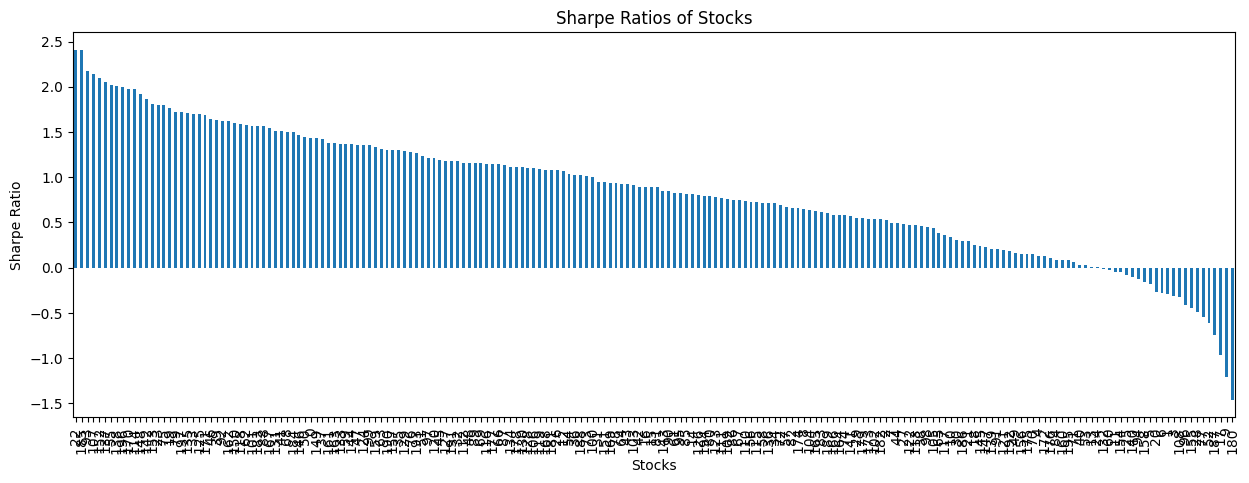

In [24]:
import matplotlib.pyplot as plt

metrics_df['sharpe_ratio'].plot(kind='bar', figsize=(15, 5), title='Sharpe Ratios of Stocks')
plt.xlabel('Stocks')
plt.ylabel('Sharpe Ratio')
plt.show()

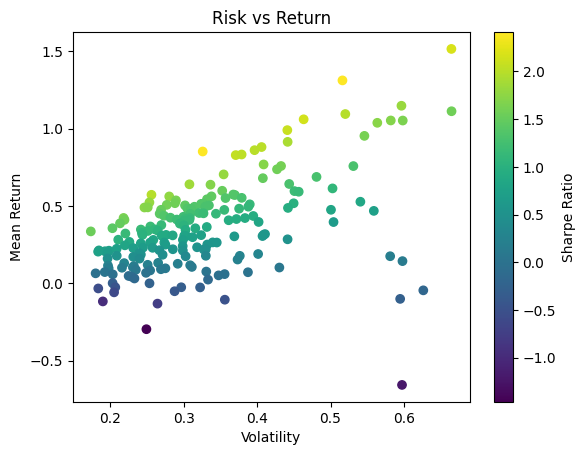

In [25]:
plt.scatter(metrics_df['volatility'], metrics_df['mean_return'], c=metrics_df['sharpe_ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Mean Return')
plt.title('Risk vs Return')
plt.show()

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
clustering_features = metrics_df[['mean_return', 'volatility', 'sharpe_ratio']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
metrics_df['Cluster'] = kmeans.fit_predict(scaled_features)

# View cluster assignments
print(metrics_df[['stocks', 'Cluster']])

            stocks  Cluster
22          BSE.NS        2
185       TRENT.NS        2
93        IREDA.NS        2
107  KALYANKJIL.NS        2
152      RECLTD.NS        2
..             ...      ...
52        DABUR.NS        1
187         UPL.NS        1
17   ASIANPAINT.NS        1
9          ATGL.NS        3
180    TATATECH.NS        1

[198 rows x 2 columns]


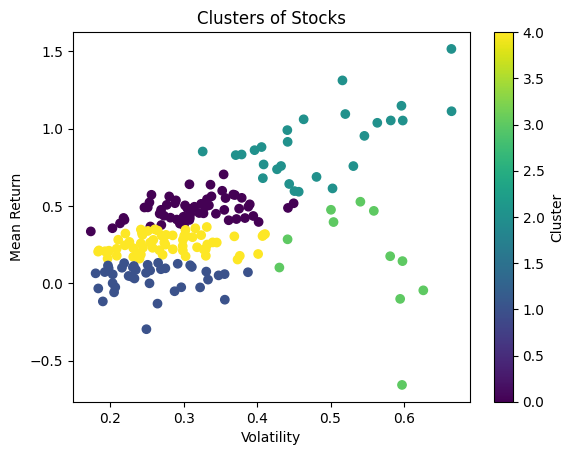

In [27]:
plt.scatter(metrics_df['volatility'], metrics_df['mean_return'], c=metrics_df['Cluster'], cmap='viridis')
plt.xlabel('Volatility')
plt.ylabel('Mean Return')
plt.title('Clusters of Stocks')
plt.colorbar(label='Cluster')
plt.show()

In [28]:
# Filter stocks with high Sharpe ratios
selected_stocks = metrics_df.nlargest(10, 'sharpe_ratio')

# Prepare data for optimization
selected_symbols = selected_stocks['stocks']
mean_returns = selected_stocks['mean_return']
volatility = selected_stocks['volatility']

In [29]:
print(selected_symbols)
print(mean_returns)
print(volatility)

22            BSE.NS
185         TRENT.NS
93          IREDA.NS
107    KALYANKJIL.NS
152        RECLTD.NS
137          OFSS.NS
55          DIXON.NS
138     POLICYBZR.NS
196        ZOMATO.NS
170        SUZLON.NS
Name: stocks, dtype: object
22     1.312559
185    0.852925
93     1.516055
107    1.060971
152    0.991086
137    0.829638
55     0.833565
138    0.881680
196    0.861492
170    1.095049
Name: mean_return, dtype: float64
22     0.516260
185    0.325852
93     0.664675
107    0.463399
152    0.441154
137    0.370874
55     0.378873
138    0.406039
196    0.396497
170    0.520140
Name: volatility, dtype: float64


In [41]:
# Ensure daily_returns includes all stocks
if isinstance(daily_returns, pd.Series):
    print("daily_returns is a Series. Recalculating for all stocks...")

    # Exclude non-numeric columns (like 'stocks')
    numeric_metrics_df = metrics_df.select_dtypes(include=['float64', 'int64'])

    # Recalculate daily returns for numeric columns
    daily_returns = numeric_metrics_df.pct_change()

    print("Recalculated daily_returns:")
    print(daily_returns.head())

In [43]:
print("Columns in daily_returns:")
print(daily_returns.columns)

Columns in daily_returns:
Index(['mean_return', 'volatility', 'cumulative_return', 'sharpe_ratio'], dtype='object')


In [44]:
print("Selected symbols:")
print(selected_symbols)

Selected symbols:
22            BSE.NS
185         TRENT.NS
93          IREDA.NS
107    KALYANKJIL.NS
152        RECLTD.NS
137          OFSS.NS
55          DIXON.NS
138     POLICYBZR.NS
196        ZOMATO.NS
170        SUZLON.NS
Name: stocks, dtype: object


Optimized Weights: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Portfolio Expected Return: 1.0235
Portfolio Volatility: 0.1448
Portfolio Sharpe Ratio: 6.7217


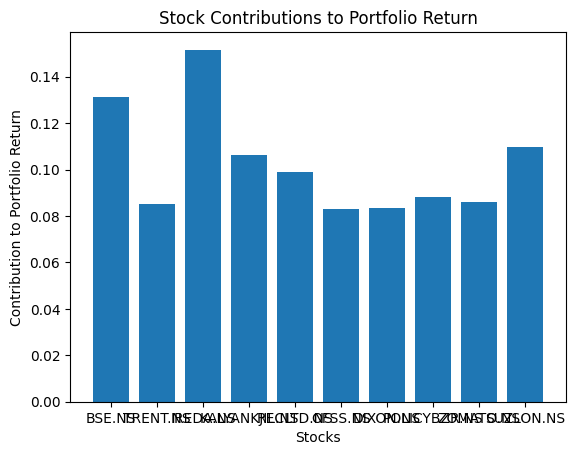

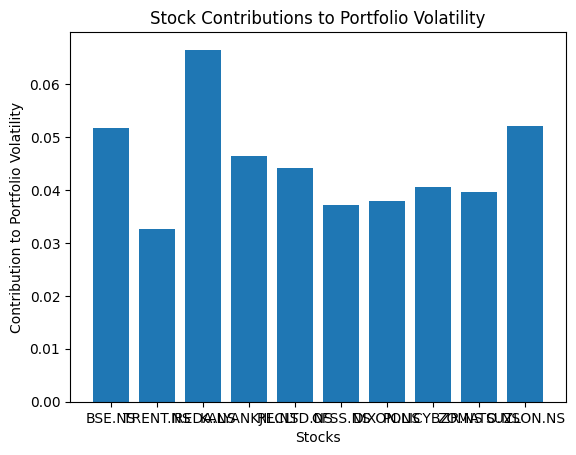

In [47]:
num_stocks = len(selected_stocks)
optimized_weights = np.array([1 / num_stocks] * num_stocks)  # Equal allocation
print("Optimized Weights:", optimized_weights)


# Portfolio expected return
portfolio_expected_return = np.dot(optimized_weights, selected_stocks['mean_return'])
print(f"Portfolio Expected Return: {portfolio_expected_return:.4f}")

# Portfolio volatility (assuming independence for simplicity)
variances = selected_stocks['volatility'] ** 2  # Variance = volatility^2
covariance_matrix = np.diag(variances)

portfolio_volatility = np.sqrt(np.dot(optimized_weights.T, np.dot(covariance_matrix, optimized_weights)))
print(f"Portfolio Volatility: {portfolio_volatility:.4f}")

# Risk-free rate (assume 5% as an example)
risk_free_rate = 0.05

# Portfolio Sharpe ratio
portfolio_sharpe_ratio = (portfolio_expected_return - risk_free_rate) / portfolio_volatility
print(f"Portfolio Sharpe Ratio: {portfolio_sharpe_ratio:.4f}")

import matplotlib.pyplot as plt

stock_return_contributions = optimized_weights * selected_stocks['mean_return']
plt.bar(selected_stocks['stocks'], stock_return_contributions)
plt.xlabel('Stocks')
plt.ylabel('Contribution to Portfolio Return')
plt.title('Stock Contributions to Portfolio Return')
plt.show()

stock_risk_contributions = optimized_weights * selected_stocks['volatility']
plt.bar(selected_stocks['stocks'], stock_risk_contributions)
plt.xlabel('Stocks')
plt.ylabel('Contribution to Portfolio Volatility')
plt.title('Stock Contributions to Portfolio Volatility')
plt.show()



In [49]:
print("Columns in daily_returns:")
print(daily_returns.columns)
# Map or filter selected symbols
mapped_symbols = [symbol for symbol in selected_symbols if symbol in daily_returns.columns]
print("Mapped Symbols:", mapped_symbols)
missing_symbols = [symbol for symbol in selected_symbols if symbol not in daily_returns.columns]
print(f"Missing symbols: {missing_symbols}")
optimized_weights = optimized_weights[:len(mapped_symbols)]

Columns in daily_returns:
Index(['mean_return', 'volatility', 'cumulative_return', 'sharpe_ratio'], dtype='object')
Mapped Symbols: []
Missing symbols: ['BSE.NS', 'TRENT.NS', 'IREDA.NS', 'KALYANKJIL.NS', 'RECLTD.NS', 'OFSS.NS', 'DIXON.NS', 'POLICYBZR.NS', 'ZOMATO.NS', 'SUZLON.NS']


Fetched data for BSE.NS
Fetched data for TRENT.NS
Fetched data for IREDA.NS
Fetched data for KALYANKJIL.NS
Fetched data for RECLTD.NS
Fetched data for OFSS.NS
Fetched data for DIXON.NS
Fetched data for POLICYBZR.NS
Fetched data for ZOMATO.NS
Fetched data for SUZLON.NS
Daily Returns:
                             BSE.NS  TRENT.NS  IREDA.NS  KALYANKJIL.NS  \
Date                                                                     
2022-12-12 00:00:00+05:30       NaN       NaN       NaN            NaN   
2022-12-13 00:00:00+05:30  0.032960 -0.004174       NaN       0.001681   
2022-12-14 00:00:00+05:30 -0.000938  0.005438       NaN      -0.004195   
2022-12-15 00:00:00+05:30 -0.008283 -0.010576       NaN       0.002106   
2022-12-16 00:00:00+05:30  0.018083 -0.019986       NaN       0.054645   

                           RECLTD.NS   OFSS.NS  DIXON.NS  POLICYBZR.NS  \
Date                                                                     
2022-12-12 00:00:00+05:30        NaN       NaN   

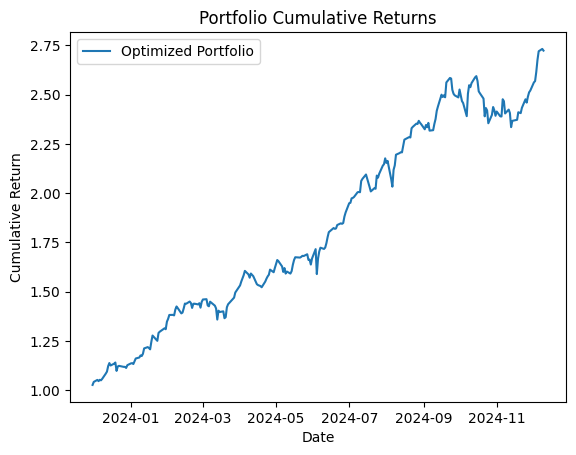

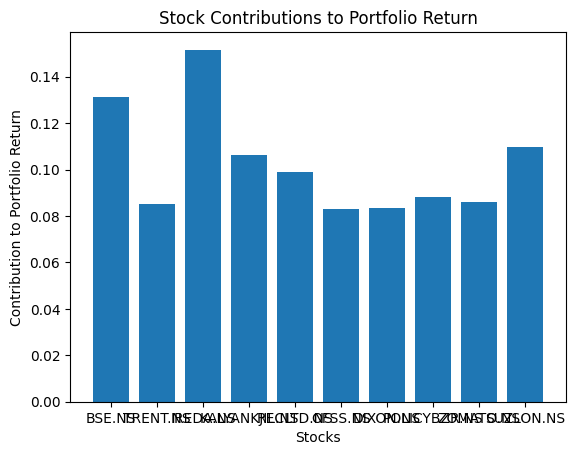

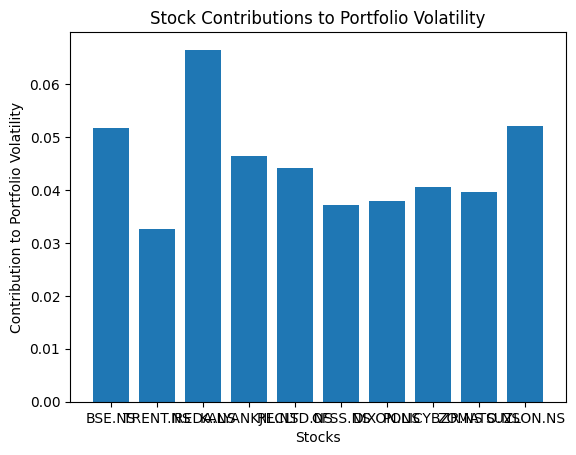

Sector Allocation:
sector
Energy           0.1
Financials       0.1
Food Delivery    0.1
Insurance        0.1
Jewelry          0.1
Manufacturing    0.1
Renewables       0.1
Retail           0.1
Technology       0.1
Utilities        0.1
Name: weights, dtype: float64


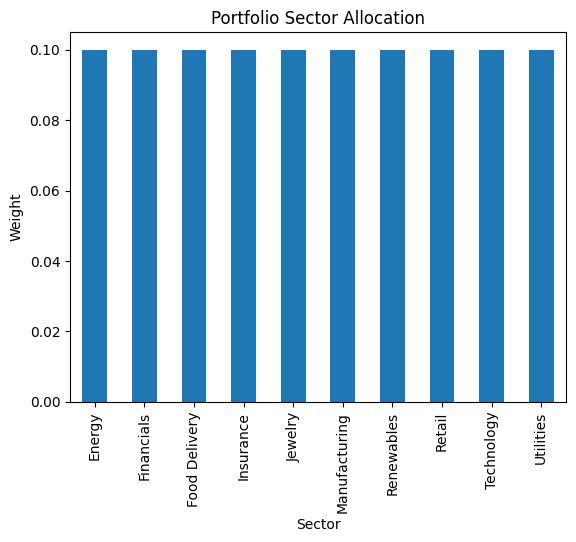

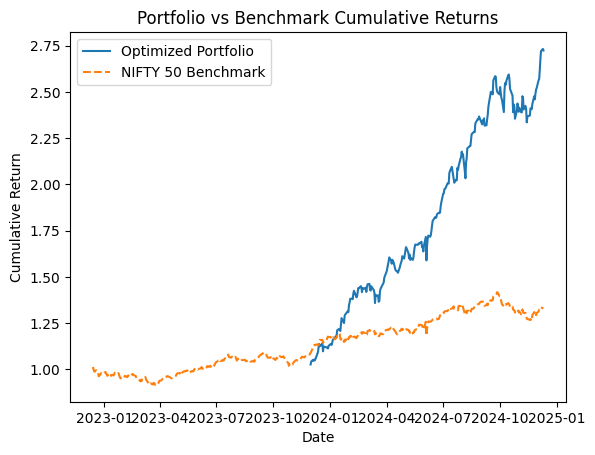

In [54]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define selected stock symbols
selected_symbols = [
    'BSE.NS', 'TRENT.NS', 'IREDA.NS', 'KALYANKJIL.NS', 'RECLTD.NS',
    'OFSS.NS', 'DIXON.NS', 'POLICYBZR.NS', 'ZOMATO.NS', 'SUZLON.NS'
]

# Step 2: Fetch historical data for the selected stocks
historical_data = {}
for symbol in selected_symbols:
    try:
        ticker = yf.Ticker(symbol)
        historical_data[symbol] = ticker.history(period="2y")['Close']
        print(f"Fetched data for {symbol}")
    except Exception as e:
        print(f"Failed to fetch data for {symbol}: {e}")

# Combine data into a DataFrame
combined_data = pd.DataFrame(historical_data)

# Step 3: Calculate daily returns
daily_returns = combined_data.pct_change()
print("Daily Returns:")
print(daily_returns.head())

# Step 4: Define equal weights for portfolio
num_stocks = len(selected_symbols)
optimized_weights = np.array([1 / num_stocks] * num_stocks)  # Equal allocation
print("Optimized Weights:", optimized_weights)

# Step 5: Portfolio-level metrics
# Portfolio daily returns
portfolio_daily_returns = daily_returns @ optimized_weights

# Portfolio cumulative returns
portfolio_cumulative_returns = (1 + portfolio_daily_returns).cumprod()

# Portfolio expected return and volatility
mean_returns = daily_returns.mean() * 252  # Annualized mean return
volatility = daily_returns.std() * np.sqrt(252)  # Annualized volatility
covariance_matrix = daily_returns.cov() * 252  # Annualized covariance matrix

portfolio_expected_return = np.dot(optimized_weights, mean_returns)
portfolio_volatility = np.sqrt(np.dot(optimized_weights.T, np.dot(covariance_matrix, optimized_weights)))

print(f"Portfolio Expected Return: {portfolio_expected_return:.4f}")
print(f"Portfolio Volatility: {portfolio_volatility:.4f}")

# Risk-free rate (assume 5%)
risk_free_rate = 0.05
portfolio_sharpe_ratio = (portfolio_expected_return - risk_free_rate) / portfolio_volatility
print(f"Portfolio Sharpe Ratio: {portfolio_sharpe_ratio:.4f}")

# Step 6: Maximum Drawdown
cumulative_returns = (1 + portfolio_daily_returns).cumprod()
rolling_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - rolling_max) / rolling_max
max_drawdown = drawdown.min()
print(f"Maximum Drawdown: {max_drawdown:.4%}")

# Step 7: Value at Risk (VaR)
confidence_level = 0.05
var = np.percentile(portfolio_daily_returns.dropna(), confidence_level * 100)
print(f"Value at Risk (5%): {var:.4%}")

# Step 8: Visualizations
# Cumulative Returns Plot
plt.plot(portfolio_cumulative_returns, label='Optimized Portfolio')
plt.title('Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# Contributions to Portfolio Return
stock_return_contributions = optimized_weights * mean_returns
plt.bar(selected_symbols, stock_return_contributions)
plt.xlabel('Stocks')
plt.ylabel('Contribution to Portfolio Return')
plt.title('Stock Contributions to Portfolio Return')
plt.show()

# Contributions to Portfolio Volatility
stock_risk_contributions = optimized_weights * volatility
plt.bar(selected_symbols, stock_risk_contributions)
plt.xlabel('Stocks')
plt.ylabel('Contribution to Portfolio Volatility')
plt.title('Stock Contributions to Portfolio Volatility')
plt.show()

# Step 9: Sector Allocation
# Example sector data (replace with actual sector information)
sector_data = pd.DataFrame({
    'stocks': selected_symbols,
    'sector': ['Financials', 'Retail', 'Energy', 'Jewelry', 'Utilities',
               'Technology', 'Manufacturing', 'Insurance', 'Food Delivery', 'Renewables']
})

sector_allocation = sector_data.merge(
    pd.DataFrame({'stocks': selected_symbols, 'weights': optimized_weights}),
    on='stocks'
).groupby('sector')['weights'].sum()

print("Sector Allocation:")
print(sector_allocation)

# Plot sector allocation
sector_allocation.plot(kind='bar', title='Portfolio Sector Allocation')
plt.xlabel('Sector')
plt.ylabel('Weight')
plt.show()

# Step 10: Compare with Benchmark (NIFTY 50)
nifty_ticker = yf.Ticker("^NSEI")  # NIFTY 50 Index
nifty_data = nifty_ticker.history(period="2y")['Close']
nifty_daily_returns = nifty_data.pct_change()
nifty_cumulative_returns = (1 + nifty_daily_returns).cumprod()

plt.plot(portfolio_cumulative_returns, label='Optimized Portfolio')
plt.plot(nifty_cumulative_returns, label='NIFTY 50 Benchmark', linestyle='--')
plt.title('Portfolio vs Benchmark Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


In [55]:
from scipy.optimize import minimize

# Define functions for portfolio return and volatility
def portfolio_return(weights, mean_returns):
    return np.dot(weights, mean_returns)

def portfolio_volatility(weights, covariance_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

# Sharpe ratio objective function
def negative_sharpe_ratio(weights, mean_returns, covariance_matrix, risk_free_rate):
    ret = portfolio_return(weights, mean_returns)
    vol = portfolio_volatility(weights, covariance_matrix)
    return -(ret - risk_free_rate) / vol

# Constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})  # Weights sum to 1
bounds = [(0, 1) for _ in range(num_stocks)]  # No short selling

# Optimize weights
result = minimize(negative_sharpe_ratio, optimized_weights, args=(mean_returns, covariance_matrix, risk_free_rate),
                  method='SLSQP', bounds=bounds, constraints=constraints)

optimized_weights = result.x
print("Optimized Weights:", optimized_weights)

# Recalculate portfolio metrics with optimized weights
portfolio_expected_return = np.dot(optimized_weights, mean_returns)
portfolio_volatility = np.sqrt(np.dot(optimized_weights.T, np.dot(covariance_matrix, optimized_weights)))
portfolio_sharpe_ratio = (portfolio_expected_return - risk_free_rate) / portfolio_volatility

print(f"Optimized Portfolio Expected Return: {portfolio_expected_return:.4f}")
print(f"Optimized Portfolio Volatility: {portfolio_volatility:.4f}")
print(f"Optimized Portfolio Sharpe Ratio: {portfolio_sharpe_ratio:.4f}")

Optimized Weights: [1.43508955e-01 2.04217584e-01 1.11759704e-01 1.34217584e-01
 4.05924540e-18 1.61967072e-01 3.31623544e-02 1.38305778e-01
 5.54548809e-02 1.74060874e-02]
Optimized Portfolio Expected Return: 1.0252
Optimized Portfolio Volatility: 0.2247
Optimized Portfolio Sharpe Ratio: 4.3406


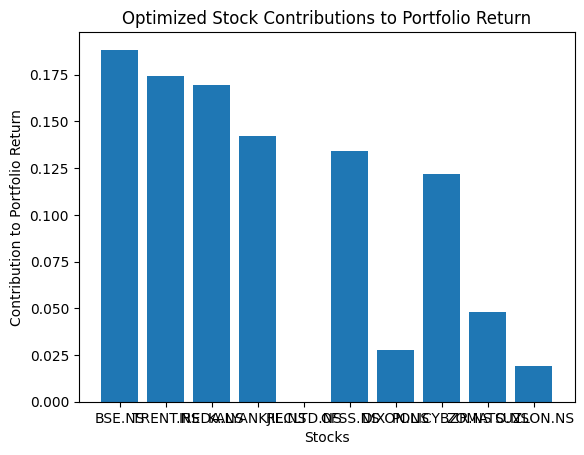

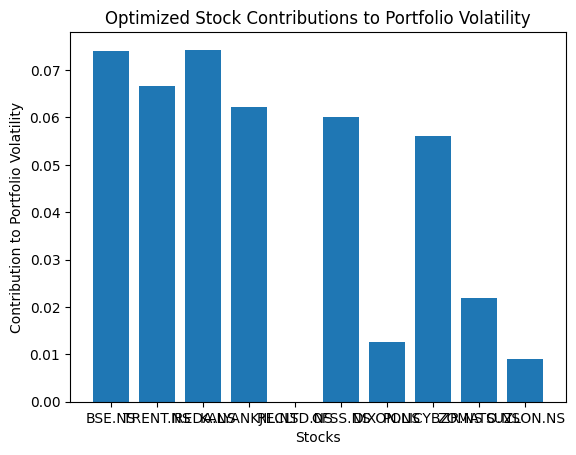

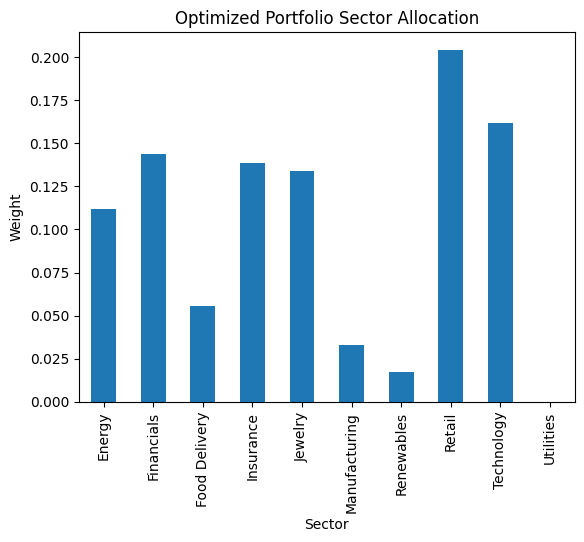

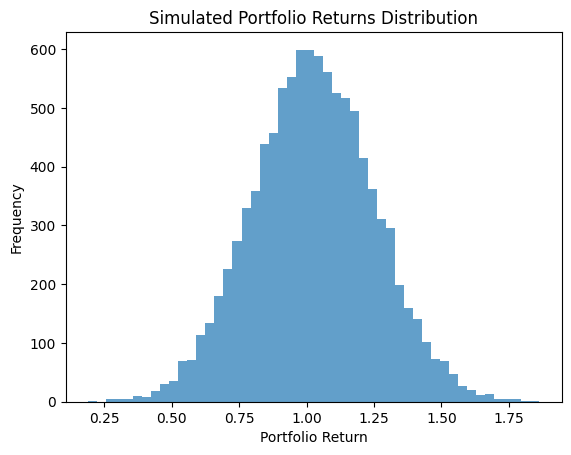

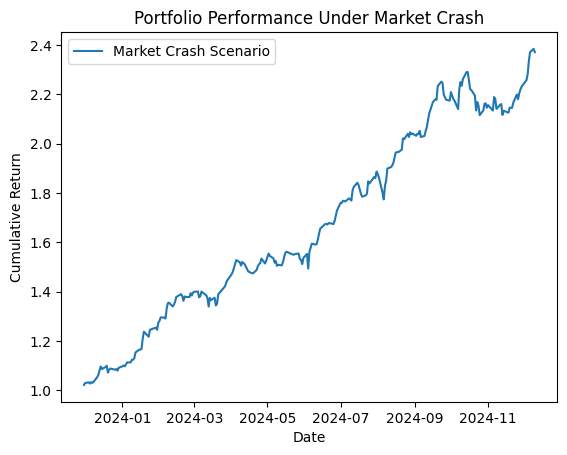

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Post-Optimization Visualizations
# Contributions to Portfolio Return with Optimized Weights
stock_return_contributions_optimized = optimized_weights * mean_returns
plt.bar(selected_symbols, stock_return_contributions_optimized)
plt.xlabel('Stocks')
plt.ylabel('Contribution to Portfolio Return')
plt.title('Optimized Stock Contributions to Portfolio Return')
plt.show()

# Contributions to Portfolio Volatility with Optimized Weights
stock_risk_contributions_optimized = optimized_weights * volatility
plt.bar(selected_symbols, stock_risk_contributions_optimized)
plt.xlabel('Stocks')
plt.ylabel('Contribution to Portfolio Volatility')
plt.title('Optimized Stock Contributions to Portfolio Volatility')
plt.show()

# Sector Allocation with Optimized Weights
sector_data = pd.DataFrame({
    'stocks': selected_symbols,
    'sector': ['Financials', 'Retail', 'Energy', 'Jewelry', 'Utilities',
               'Technology', 'Manufacturing', 'Insurance', 'Food Delivery', 'Renewables']
})

sector_allocation_optimized = sector_data.merge(
    pd.DataFrame({'stocks': selected_symbols, 'weights': optimized_weights}),
    on='stocks'
).groupby('sector')['weights'].sum()

sector_allocation_optimized.plot(kind='bar', title='Optimized Portfolio Sector Allocation')
plt.xlabel('Sector')
plt.ylabel('Weight')
plt.show()

# Step 2: Monte Carlo Simulations
# Simulating Portfolio Returns
simulated_returns = np.random.multivariate_normal(mean_returns, covariance_matrix, 10000)
simulated_portfolio_returns = np.dot(simulated_returns, optimized_weights)

plt.hist(simulated_portfolio_returns, bins=50, alpha=0.7)
plt.title('Simulated Portfolio Returns Distribution')
plt.xlabel('Portfolio Return')
plt.ylabel('Frequency')
plt.show()

# Step 3: Scenario Testing (Market Crash)
# Simulate a Market Crash
market_crash_returns = daily_returns * 0.8  # Assume all returns drop by 20%
crash_portfolio_daily_returns = market_crash_returns @ optimized_weights
crash_cumulative_returns = (1 + crash_portfolio_daily_returns).cumprod()

plt.plot(crash_cumulative_returns, label='Market Crash Scenario')
plt.title('Portfolio Performance Under Market Crash')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

In [59]:
import numpy as np
import pandas as pd

# Define Equal Weights
num_stocks = len(selected_symbols)  # Ensure selected_symbols is already defined
equal_weights = np.array([1 / num_stocks] * num_stocks)  # Equal allocation

# Ensure necessary variables are defined
if 'mean_returns' not in locals():
    mean_returns = daily_returns.mean() * 252  # Annualized mean return
if 'covariance_matrix' not in locals():
    covariance_matrix = daily_returns.cov() * 252  # Annualized covariance matrix
if 'risk_free_rate' not in locals():
    risk_free_rate = 0.05  # Assume 5% risk-free rate

# Recalculate Equal Weights Metrics
portfolio_expected_return = np.dot(equal_weights, mean_returns)  # Expected return
portfolio_volatility = np.sqrt(np.dot(equal_weights.T, np.dot(covariance_matrix, equal_weights)))  # Volatility
portfolio_sharpe_ratio = (portfolio_expected_return - risk_free_rate) / portfolio_volatility  # Sharpe ratio

# Recalculate Optimized Weights if Missing
if 'optimized_weights' not in locals():
    from scipy.optimize import minimize

    def negative_sharpe_ratio(weights, mean_returns, covariance_matrix, risk_free_rate):
        ret = np.dot(weights, mean_returns)
        vol = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
        return -(ret - risk_free_rate) / vol

    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = [(0, 1) for _ in range(num_stocks)]

    result = minimize(
        negative_sharpe_ratio,
        equal_weights,
        args=(mean_returns, covariance_matrix, risk_free_rate),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    optimized_weights = result.x

# Calculate Optimized Weights Metrics
optimized_portfolio_expected_return = np.dot(optimized_weights, mean_returns)
optimized_portfolio_volatility = np.sqrt(np.dot(optimized_weights.T, np.dot(covariance_matrix, optimized_weights)))
optimized_portfolio_sharpe_ratio = (optimized_portfolio_expected_return - risk_free_rate) / optimized_portfolio_volatility

# Ensure Risk Metrics Are Computed
if 'max_drawdown' not in locals():
    cumulative_returns = (1 + portfolio_daily_returns).cumprod()
    rolling_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - rolling_max) / rolling_max
    max_drawdown = drawdown.min()

if 'var' not in locals():
    confidence_level = 0.05
    var = np.percentile(portfolio_daily_returns.dropna(), confidence_level * 100)

# Metrics Summary Table
metrics = {
    "Metric": ["Expected Return", "Volatility", "Sharpe Ratio", "Maximum Drawdown", "Value at Risk (5%)"],
    "Equal Weights": [portfolio_expected_return, portfolio_volatility, portfolio_sharpe_ratio, max_drawdown, var],
    "Optimized Weights": [optimized_portfolio_expected_return, optimized_portfolio_volatility, optimized_portfolio_sharpe_ratio, max_drawdown, var]
}
metrics_df = pd.DataFrame(metrics)
print("Portfolio Metrics Summary:")
print(metrics_df)

# Benchmark Analysis (NIFTY 50)
nifty_expected_return = nifty_daily_returns.mean() * 252
nifty_volatility = nifty_daily_returns.std() * np.sqrt(252)
nifty_sharpe_ratio = (nifty_expected_return - risk_free_rate) / nifty_volatility

print("\nNIFTY 50 Benchmark Metrics:")
print(f"NIFTY 50 Expected Return: {nifty_expected_return:.4f}")
print(f"NIFTY 50 Volatility: {nifty_volatility:.4f}")
print(f"NIFTY 50 Sharpe Ratio: {nifty_sharpe_ratio:.4f}")

# Diversification Analysis
# Herfindahl-Hirschman Index (HHI) for weight concentration
hhi_concentration = np.sum(optimized_weights ** 2)  # Higher HHI = More concentrated portfolio
print(f"\nPortfolio Diversification (Concentration - HHI): {hhi_concentration:.4f}")
if hhi_concentration < 0.15:
    print("The portfolio is well-diversified.")
else:
    print("The portfolio is somewhat concentrated.")

# Export Results to CSV
# Combine key metrics into a summary DataFrame
summary_data = {
    "Metric": ["Expected Return", "Volatility", "Sharpe Ratio", "Maximum Drawdown", "Value at Risk (5%)", "Portfolio Concentration (HHI)"],
    "Equal Weights": [portfolio_expected_return, portfolio_volatility, portfolio_sharpe_ratio, max_drawdown, var, np.sum(equal_weights ** 2)],
    "Optimized Weights": [optimized_portfolio_expected_return, optimized_portfolio_volatility, optimized_portfolio_sharpe_ratio, max_drawdown, var, hhi_concentration],
    "NIFTY 50 Benchmark": [nifty_expected_return, nifty_volatility, nifty_sharpe_ratio, "-", "-", "-"]
}
summary_df = pd.DataFrame(summary_data)
summary_df.to_csv("portfolio_summary.csv", index=False)
print("\nPortfolio summary has been exported to 'portfolio_summary.csv'.")


Portfolio Metrics Summary:
               Metric  Equal Weights  Optimized Weights
0     Expected Return       1.023502           1.025174
1          Volatility       0.237333           0.224664
2        Sharpe Ratio       4.101833           4.340579
3    Maximum Drawdown      -0.099810          -0.099810
4  Value at Risk (5%)      -0.021967          -0.021967

NIFTY 50 Benchmark Metrics:
NIFTY 50 Expected Return: 0.1540
NIFTY 50 Volatility: 0.1217
NIFTY 50 Sharpe Ratio: 0.8549

Portfolio Diversification (Concentration - HHI): 0.1426
The portfolio is well-diversified.

Portfolio summary has been exported to 'portfolio_summary.csv'.
